In [6]:
import math
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# 第一问
生成两个各包含$N = 1000$ 个二维样本的数据集 $\Chi_1$ 和 $\Chi_2$。数据集中的样本
来自于三个正态分布，分布的均值矢量分别为 $m_1 = [1,1]^\Tau$、$m_2 = [4,4]^\Tau$ 和 $m_3 = [8,1]^\Tau$，分布的协方差矩阵为 $\Sigma_1 = \Sigma_2 = \Sigma_3 = 2\Iota$，其中 $\Iota$ 是 2 × 2 维的单位矩阵。在
生成数据集 $\Chi_1$ 时，样本来自三个分布模型的先验概率相同，而在生成数据集 $\Chi_2$ 时，
先验概率分别为 $p(\omega_1) = 0.6$、$p(\omega_2) = 0.3$ 和 $p(\omega_3) = 0.1$。分别画出所生成两个数
据集中样本的散布图。

In [7]:
# 根据均值矢量以及协方差使用正态分布生成数据集函数
def generate_value(means, count):
    return np.random.multivariate_normal(means, [[2, 0], [0, 2]], count)

default_mean = [[1, 1], [4, 4], [8, 1]]
default_N = 1000
# 根据概率生成
def generate_by_p(p):
    data_list = []
    target_list = []
    for i in range(len(default_mean)):
        size = math.floor(default_N * p[i])
        data_list.append(generate_value(default_mean[i], size))
        target_list.append([i+1] * size)
    return data_list, target_list

## 生成$\Chi_1$ 和 $\Chi_2$

In [8]:
temp_X1, y1 = generate_by_p([0.333, 0.333, 0.334])
temp_X2, y2 = generate_by_p([0.6, 0.3, 0.1])
X1 = np.concatenate(temp_X1, axis=0)
X2 = np.concatenate(temp_X2, axis=0)

## 绘制$\Chi_1$图像

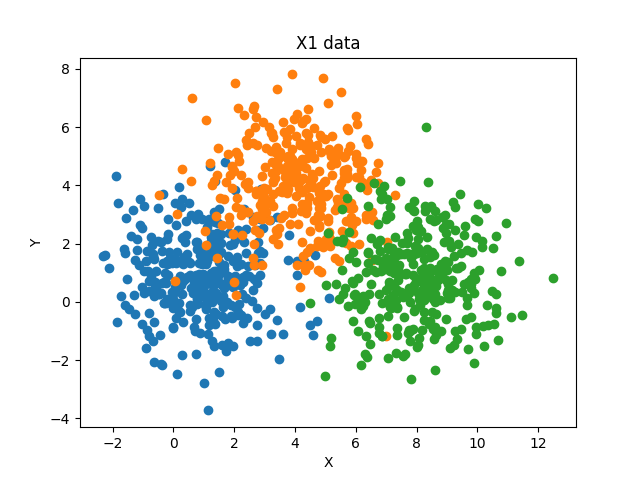

In [9]:
for j in range(len(temp_X1)):
    plt.scatter(temp_X1[j][:, 0], temp_X1[j][:, 1])
plt.title("X1 data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
plt.close()

## 绘制$\Chi_2$图像

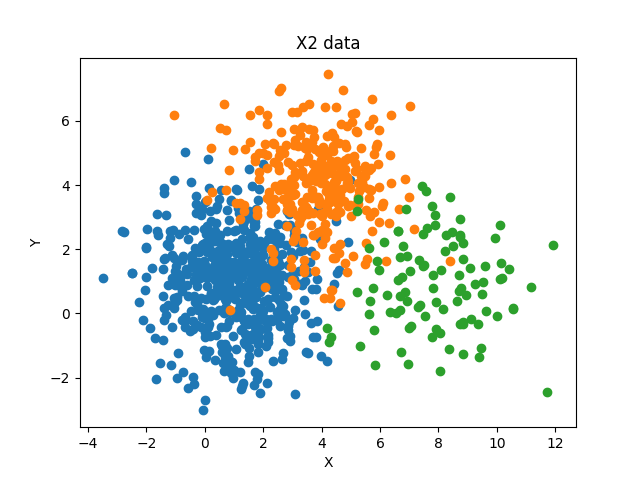

In [10]:
for j in range(len(temp_X2)):
    plt.scatter(temp_X2[j][:, 0], temp_X2[j][:, 1])
plt.title("X2 data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
plt.close()

## 第二问
在两个数据集上分别应用“似然率决策规则”、“贝叶斯风险决策规则”（其中
$C_{12} = 2$, $C_{13} = 3$, $C_{23} = 2.5$, $C_{11} = C_{22} = C_{33} = 0$, $C_{21} = C_{31} = C_{32} = 1$）、“最小欧几里
得距离分类器”进行样本分类实验，给出实验过程设计（包括源代码）和实验结果。

### (1). 对$p(y| x, \theta)$ 进行概率假设。这里使用Softmax进行概率假设
$$
h(x)_k := p(y = k | x, \theta) := \frac {e^{\theta_k^\Tau x}}{\sum_{c=1}^{C}e^{\theta_c^\Tau x}}
$$
其中这里C=3,对应着一共有3组解，即上式可以写成
$$
h(x)_k := p(y = k | x, \theta) := \frac {e^{\theta_k^\Tau x}}{e^{\theta_1^\Tau x} + e^{\theta_2^\Tau x} + e^{\theta_3^\Tau x}}
$$

In [12]:
def calculate_softmax_probability(x, w):
    probabilities = []
    total = 0
    n = w.shape[0]
    for i in range(n):
        total += np.exp(np.dot(x, w[i]))
    for i in range(n):
        probabilities.append(np.exp(x, w[i]) / total)
    return probabilities

### (2.1).对参数$\theta$进行最大后验估计。
